In [1]:
# librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
# lectura de datos 
Datos=pd.read_excel('DatosTarea6.xlsx')
Datos.head()

,ELEKTRA,GMODELO C,KIMBER A,KOF L,GOOG,M_BONOS_171214,S_UDIBONO_251204,ORO,EURO
2011-01-04,-0.005366,-0.020709,0.003607,-0.001193,-0.002963,0.002348,0.004840,-0.021782,0.001116
2011-01-05,-0.002957,-0.003605,0.000000,0.002186,0.002403,-0.006856,-0.005311,-0.010842,-0.015430
2011-01-06,-0.001013,0.000134,-0.000667,0.009584,0.010390,0.001265,-0.000798,-0.001705,-0.008379
2011-01-07,-0.003790,0.008788,-0.009519,-0.001082,0.006628,0.002345,0.002581,0.000559,-0.009199
2011-01-10,-0.002764,0.001987,-0.010972,-0.004143,-0.000799,-0.000178,-0.002297,0.004764,-0.003458


In [3]:
Columnas=[i for i in Datos.columns if i!=" "]

In [437]:
def matrix_std(lista):
    """
     Calcula la matriz de desviaciones estandar(riesgo del portafolio)
        
    Parametro:
     -------
    lista:list
        Lista  que contiene el nombre de las columnas del Dataframe
    
    Retuns:
      -----
      list:
         Matriz con las desviaciones etandar del portafolio 
         
    """
    filas=[i for i in range(len(lista))]
    columnas=filas
    def std(fila):
        n=len(Datos[lista[fila]])
        if fila!=5 and fila!=6:
             return (sqrt(sum((x-Datos[Columnas[fila]].mean())**2 for x in Datos[Columnas[fila]]))/sqrt(n))*sqrt(252)
        else:
             return (sqrt(sum((x-Datos[Columnas[fila]].mean())**2 for x in Datos[Columnas[fila]]))/sqrt(n))*sqrt(360)
    matrix=[round(std(fila),6) if fila==columna else 0 for fila in filas for columna in columnas ]
    return [matrix[i:i+len(lista)] for i in range(0,len(matrix),len(lista))]

def ver_data(Lista,indices=Columnas):
    """
     Regresa la visualización de los datos de un np.array
    
    Parametros:
     -------
    Lista:list
        Lista  que contiene los datos de la tabla o matriz
    
    Retuns:
      -----
      Dataframe:
          Dataframe donde se  en una tabla los datos
    """
    return pd.DataFrame({i+1:pd.Series(Lista[i],index=indices) for i in range(len(Lista))})


In [438]:
# Matriz de riesgo del portafolio
sigma=matrix_std(Columnas);sigma

[[0.508802, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0.273779, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0.234345, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0.244054, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0.308077, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0.051193, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0.099947, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0.20745, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.119609]]

In [439]:
# Matriz de correlación del portafolio
Lista_Datos=[Datos[columna] for columna in Columnas]
sigma=np.array(sigma)
matρ=np.corrcoef(Lista_Datos)#np.corrcoef(Datos)
ver_data(matρ)

,1,2,3,4,5,6,7,8,9
ELEKTRA,1.000000,0.178459,0.261077,0.079983,0.057326,0.013190,0.102355,-0.145366,-0.113353
GMODELO C,0.178459,1.000000,0.202868,0.248900,0.072715,0.016604,0.034245,-0.077614,-0.106783
KIMBER A,0.261077,0.202868,1.000000,0.227514,0.038070,0.040851,-0.016654,-0.126229,-0.166021
KOF L,0.079983,0.248900,0.227514,1.000000,0.093153,0.116748,0.021857,-0.040049,-0.103249
GOOG,0.057326,0.072715,0.038070,0.093153,1.000000,-0.162544,-0.121418,0.175762,0.344447
M_BONOS_171214,0.013190,0.016604,0.040851,0.116748,-0.162544,1.000000,0.700695,0.196246,-0.074040
S_UDIBONO_251204,0.102355,0.034245,-0.016654,0.021857,-0.121418,0.700695,1.000000,0.120427,-0.039311
ORO,-0.145366,-0.077614,-0.126229,-0.040049,0.175762,0.196246,0.120427,1.000000,0.292206
EURO,-0.113353,-0.106783,-0.166021,-0.103249,0.344447,-0.074040,-0.039311,0.292206,1.000000


In [475]:
# Matriz de varianzas y covarianzas
MVC=sigma@matρ@sigma.T 
Lista=[]
for  fila  in MVC:
    Lista.append(np.append(fila,1))
Aumento=[1 for i in range(len(Lista[0])-1)]+[0]
Lista.append(np.array(Aumento))
MVCA=np.array(Lista)
# Matriz de varianza y covarianza aumentada
ver_data([list(MVCA[i]) for i in range(len(MVCA))],Columnas+["Aumento"])

,1,2,3,4,5,6,7,8,9,10
ELEKTRA,0.258879,0.024859,0.031130,0.009932,0.008986,0.000344,0.005205,-0.015343,-0.006898,1.0
GMODELO C,0.024859,0.074955,0.013016,0.016631,0.006133,0.000233,0.000937,-0.004408,-0.003497,1.0
KIMBER A,0.031130,0.013016,0.054918,0.013012,0.002749,0.000490,-0.000390,-0.006137,-0.004654,1.0
KOF L,0.009932,0.016631,0.013012,0.059562,0.007004,0.001459,0.000533,-0.002028,-0.003014,1.0
GOOG,0.008986,0.006133,0.002749,0.007004,0.094911,-0.002564,-0.003739,0.011233,0.012692,1.0
M_BONOS_171214,0.000344,0.000233,0.000490,0.001459,-0.002564,0.002621,0.003585,0.002084,-0.000453,1.0
S_UDIBONO_251204,0.005205,0.000937,-0.000390,0.000533,-0.003739,0.003585,0.009989,0.002497,-0.000470,1.0
ORO,-0.015343,-0.004408,-0.006137,-0.002028,0.011233,0.002084,0.002497,0.043036,0.007250,1.0
EURO,-0.006898,-0.003497,-0.004654,-0.003014,0.012692,-0.000453,-0.000470,0.007250,0.014306,1.0
Aumento,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [476]:
# Cálculando La matriz de W
B=np.array([0]*9+[1]).reshape(10,1)
W=MVCA_inv@B
W,W.sum()-W[-1] #Mtariz,Suma igual a uno

(array([[ 0.00596945],
        [ 0.02111502],
        [ 0.0254768 ],
        [ 0.00198024],
        [ 0.01614537],
        [ 0.9233105 ],
        [-0.13753681],
        [-0.01851005],
        [ 0.16204947],
        [-0.00179555]]), array([1.]))

In [494]:
RendimientosP=[Datos[col].mean()*252 if (col!= 'M_BONOS_171214' and col!= 'S_UDIBONO_251204')
              else Datos[col].mean()*360  for col in Columnas]
Riesgo=sigma.diagonal()
[(c,round(e,6),r) for c,e,r in zip(Columnas,RendimientosP,Riesgo)]

[('ELEKTRA', 0.122458, 0.508802),
 ('GMODELO C', 0.318111, 0.273779),
 ('KIMBER A', 0.092819, 0.234345),
 ('KOF L', 0.28406, 0.244054),
 ('GOOG', 0.120932, 0.308077),
 ('M_BONOS_171214', 0.12314, 0.051193),
 ('S_UDIBONO_251204', 0.278295, 0.099947),
 ('ORO', 0.125717, 0.20745),
 ('EURO', -0.011475, 0.119609)]

In [11]:
#Cálculando el rendimiento y la volatidlidad del portafolio 
RE=np.array(Rendimientos)
E_p=W[:-1].T@RE.T
E_p[0],sqrt(W[:-1].T@MVC@W[:-1])

(0.08356176773725313, 0.042373983220694696)

In [477]:
# Haciendo el cálculo con la matriz de doble aumento
ListaAA=[]
for  fila,rendimiento  in zip(MVCA,np.append(RE,0)):
    ListaAA.append(np.append(fila,rendimiento))
Aumento2=list(RE)+[0]*2
ListaAA.append(np.array(Aumento2))
MVCAA=np.array(ListaAA)
ver_data([list(MVCAA[i]) for i in range(len(MVCAA))],Columnas+["Aumento","Aumento'"])

,1,2,3,4,5,6,7,8,9,10,11
ELEKTRA,0.258879,0.024859,0.031130,0.009932,0.008986,0.000344,0.005205,-0.015343,-0.006898,1.0,0.122458
GMODELO C,0.024859,0.074955,0.013016,0.016631,0.006133,0.000233,0.000937,-0.004408,-0.003497,1.0,0.318111
KIMBER A,0.031130,0.013016,0.054918,0.013012,0.002749,0.000490,-0.000390,-0.006137,-0.004654,1.0,0.092819
KOF L,0.009932,0.016631,0.013012,0.059562,0.007004,0.001459,0.000533,-0.002028,-0.003014,1.0,0.284060
GOOG,0.008986,0.006133,0.002749,0.007004,0.094911,-0.002564,-0.003739,0.011233,0.012692,1.0,0.120932
M_BONOS_171214,0.000344,0.000233,0.000490,0.001459,-0.002564,0.002621,0.003585,0.002084,-0.000453,1.0,0.123140
S_UDIBONO_251204,0.005205,0.000937,-0.000390,0.000533,-0.003739,0.003585,0.009989,0.002497,-0.000470,1.0,0.278295
ORO,-0.015343,-0.004408,-0.006137,-0.002028,0.011233,0.002084,0.002497,0.043036,0.007250,1.0,0.125717
EURO,-0.006898,-0.003497,-0.004654,-0.003014,0.012692,-0.000453,-0.000470,0.007250,0.014306,1.0,-0.011475
Aumento,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000


In [651]:
#INVERSA MCVAAA
MVCAA_IN=np.linalg.inv(MVCAA)
def MATRIXw(R,n,i,op=1):
    """
     Regresa la matriz de los valores de Wi del portafolio
    
    Parametros:
     -------
    R:float 
        Valor en donde inician los rendientos
    n: int
     la longitud de las carteras
    i: float
        incrementos
    op: bool
       1 si R+=R*i
       0 si R+=i
    
    Retuns:
      -----
      ndarray
    """
    Vector=[]
    for x in range(n):
        Vector=Vector+[R]
        if op==1:
            R+=R*i
        else:
            R+=i
    Identidad=np.vstack([np.zeros([9,n]),np.ones([1,n]),np.array(Vector)])
    Pesos=MVCAA_IN@Identidad
    return (Pesos.T,np.array(Vector)) #0 Para los pesos y 1 para el valor de las esperanzas 


In [653]:
def volatidades(Matriz_Pesos):
    """
     Regresa la matriz de la volatidad para diferentes portafolios
    
    Parametros:
     -------
     Matri_Pesos: list
       Lista con los pesos del portafolio
    
    Retuns:
      -----
      ndarray
    """
    return [sqrt(Matriz_Pesos[i,:-2].T@MVC@Matriz_Pesos[i,:-2]) for i in range(len(Matriz_Pesos))]

In [642]:
a,b,c,d=-2.50,241,0.02,0
Matriz_Eje1=MATRIXw(a,b,c,d)
print('Tabla con los valores de W')
ver_data([list(Matriz_Eje1[0][i]) for i in range(len(Matriz_Eje1[0]))],Columnas+["Aumento","Aumento'"])

Tabla con los valores de W


,1,2,3,4,5,6,7,8,9,10,...,232,233,234,235,236,237,238,239,240,241
ELEKTRA,0.325146,0.322675,0.320205,0.317734,0.315263,0.312792,0.310321,0.307851,0.305380,0.302909,...,-0.245615,-0.248086,-0.250557,-0.253028,-0.255498,-0.257969,-0.260440,-0.262911,-0.265382,-0.267852
GMODELO C,-0.841679,-0.835000,-0.828321,-0.821642,-0.814963,-0.808284,-0.801605,-0.794926,-0.788246,-0.781567,...,0.701195,0.707874,0.714553,0.721232,0.727911,0.734590,0.741269,0.747948,0.754627,0.761307
KIMBER A,0.306534,0.304359,0.302183,0.300007,0.297832,0.295656,0.293480,0.291304,0.289129,0.286953,...,-0.196061,-0.198237,-0.200412,-0.202588,-0.204764,-0.206940,-0.209115,-0.211291,-0.213467,-0.215643
KOF L,-1.157304,-1.148330,-1.139355,-1.130381,-1.121407,-1.112432,-1.103458,-1.094484,-1.085509,-1.076535,...,0.915762,0.924736,0.933710,0.942685,0.951659,0.960633,0.969607,0.978582,0.987556,0.996530
GOOG,-0.547826,-0.543461,-0.539095,-0.534729,-0.530363,-0.525997,-0.521631,-0.517266,-0.512900,-0.508534,...,0.460684,0.465050,0.469416,0.473782,0.478148,0.482514,0.486879,0.491245,0.495611,0.499977
M_BONOS_171214,11.873645,11.788875,11.704106,11.619337,11.534568,11.449798,11.365029,11.280260,11.195490,11.110721,...,-7.708060,-7.792829,-7.877599,-7.962368,-8.047137,-8.131907,-8.216676,-8.301445,-8.386214,-8.470984
S_UDIBONO_251204,-11.670544,-11.581264,-11.491984,-11.402704,-11.313424,-11.224144,-11.134864,-11.045584,-10.956304,-10.867025,...,8.953113,9.042393,9.131673,9.220953,9.310233,9.399513,9.488793,9.578073,9.667353,9.756632
ORO,-0.646325,-0.641464,-0.636604,-0.631744,-0.626884,-0.622024,-0.617164,-0.612304,-0.607444,-0.602584,...,0.476352,0.481212,0.486072,0.490932,0.495792,0.500652,0.505512,0.510372,0.515232,0.520092
EURO,3.358352,3.333609,3.308866,3.284122,3.259379,3.234636,3.209892,3.185149,3.160405,3.135662,...,-2.357369,-2.382113,-2.406856,-2.431599,-2.456343,-2.481086,-2.505829,-2.530573,-2.555316,-2.580060
Aumento,-0.034745,-0.034490,-0.034235,-0.033979,-0.033724,-0.033469,-0.033214,-0.032959,-0.032704,-0.032449,...,0.024176,0.024431,0.024686,0.024941,0.025196,0.025451,0.025706,0.025961,0.026216,0.026472


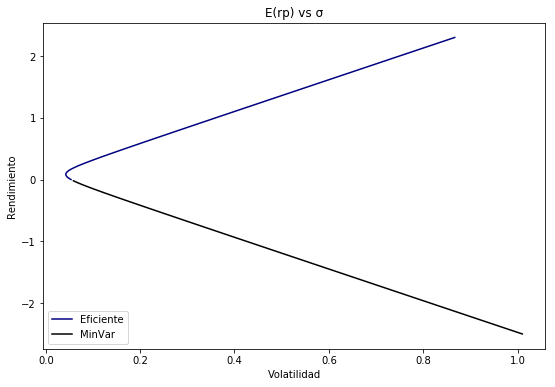

In [655]:
def front_efic(matrix):return np.where(matrix>0)
def front_mv(matrix):return np.where(matrix<=0)
def grafica_fronteras(a,b,c,d):
    """
     Regresa la grafica de las fronteras eficientes y de minima varianza
    Parametros:
     -------
    a:float 
        Valor en donde inician los rendientos
    b: int
     la longitud de las carteras
    c: float
        incrementos
    d: bool
       1 si R+=R*i
       0 si R+=i
    
    
    Retuns:
      -----
      NULL
    """
    IND_FRONT_EF=front_efic(MATRIXw(a,b,c,d)[1]) #Valores del Rendimiento para el portafolio
    IND_FRONT_MV=front_mv(MATRIXw(a,b,c,d)[1]) #Valores del Rendimiento para el portafolio
    X=np.array(volatidades(MATRIXw(a,b,c,d)[0])) #Valores de la volatilidad
    Y_F_EF=MATRIXw(a,b,c,d)[1][IND_FRONT_EF] #Parte superior de la parabola
    Y_F_MV=MATRIXw(a,b,c,d)[1][IND_FRONT_MV] #Parte inferior de la parabola
    plt.title('E(rp) vs σ')
    plt.plot(X[IND_FRONT_EF],Y_F_EF,label="Eficiente",color="navy")
    plt.plot(X[IND_FRONT_MV],Y_F_MV,label="MinVar",color="k")
    plt.legend(loc="lower left")
    plt.xlabel('Volatilidad')
    plt.ylabel('Rendimiento')
grafica_fronteras(-2.50,241,0.02,0)

##  Ejercicio 2

In [568]:
a,b,c,d=-2.50,241,0.02,0
Matriz=MATRIXw(a,b,c,d)  #Matriz Wefront efic
CMW=W[:-1]
Portafolios=[]
def join_list(lista):return [lista[i][0] for i in range(len(lista))]
for i in front_efic(Matriz[1])[0]:
    Num_alt=np.random.rand(1) #Aleatorio
    MWef=Matriz[0][i,:-2].reshape(9,1)
    Portafolios.append(join_list(Num_alt*CMW+(1-Num_alt)*ER))
ver_data(Portafolios)

,1,2,3,4,5,6,7,8,9,10,...,107,108,109,110,111,112,113,114,115,116
ELEKTRA,-0.008711,-0.019371,-0.021751,-0.002254,-0.036938,-0.043530,-0.024486,-0.012577,-0.020149,-0.041310,...,0.005899,-0.005324,-0.004654,-0.016660,0.005768,0.002835,-0.024038,-0.004017,-0.035616,-0.033432
GMODELO C,0.060799,0.089615,0.096049,0.043346,0.137102,0.154921,0.103443,0.071250,0.091718,0.148921,...,0.021305,0.051644,0.049832,0.082288,0.021659,0.029587,0.102232,0.048111,0.133529,0.127625
KIMBER A,0.012550,0.003163,0.001067,0.018235,-0.012306,-0.018111,-0.001342,0.009145,0.002478,-0.016156,...,0.025415,0.015532,0.016122,0.005550,0.025299,0.022717,-0.000947,0.016683,-0.011142,-0.009219
KOF L,0.055301,0.094020,0.102664,0.031850,0.157824,0.181767,0.112599,0.069344,0.096846,0.173705,...,0.002235,0.043001,0.040565,0.084175,0.002712,0.013363,0.110972,0.038253,0.153024,0.145091
GOOG,0.042085,0.060921,0.065126,0.030677,0.091961,0.103609,0.069960,0.048917,0.062296,0.099687,...,0.016270,0.036101,0.034916,0.056131,0.016501,0.021683,0.069168,0.033792,0.089625,0.085766
M_BONOS_171214,0.419655,0.053925,-0.027728,0.641166,-0.548757,-0.774918,-0.121572,0.287009,0.027233,-0.698766,...,0.920900,0.535840,0.558845,0.146922,0.916401,0.815787,-0.106197,0.580685,-0.503412,-0.428479
S_UDIBONO_251204,0.392919,0.778109,0.864107,0.159620,1.412860,1.651055,0.962945,0.532623,0.806221,1.570851,...,-0.134998,0.270551,0.246323,0.680164,-0.130259,-0.024292,0.946751,0.223320,1.365103,1.286182
ORO,0.010366,0.031334,0.036016,-0.002334,0.065888,0.078854,0.041396,0.017971,0.032865,0.074488,...,-0.018372,0.003705,0.002386,0.026003,-0.018114,-0.012345,0.040515,0.001134,0.063288,0.058992
EURO,0.015037,-0.091716,-0.115550,0.079694,-0.267634,-0.333648,-0.142942,-0.023681,-0.099507,-0.311420,...,0.161346,0.048950,0.055665,-0.064571,0.160033,0.130664,-0.138454,0.062040,-0.254398,-0.232526


## Ejercicio 3

In [569]:
Matriz_ejemplo=MATRIXw(a,b,c,d)
Ind=front_efic(Matriz_ejemplo[1])
S=lambda Erp,sp:(Erp-0.042543)/sp
Sigmas=np.array(volatidades(Matriz_ejemplo[0]))[Ind]
Rendimientos=MATRIXw(a,b,c,d)[1][Ind]
Lista_S=list(map(S,Rendimientos,Sigmas)) #Lista que tiene los valores de S para los portafolios que estan dentro la frontera eficiente

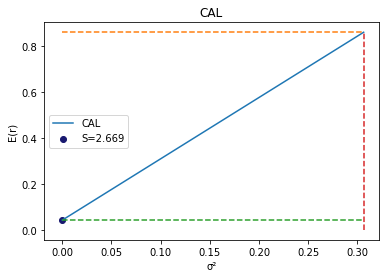

In [575]:
def plot_CAL(ERP,sp,i=0.042543):
    A=(sp,ERP)
    B=(0,i)
    m=(B[1]-A[1])/(B[0]-A[0])
    den=round(S(ERP,sp),4)
    vector=np.linspace(0,sp,13)
    plt.plot(vector,[m*x+i for x in vector],label="CAL")
    plt.plot(vector,[ERP for i in vector],linestyle="dashed")
    RF=[B[1] for i in vector]
    plt.plot(vector,RF,linestyle="dashed")
    rvert=np.linspace(0,ERP,11)
    plt.plot([sp for x in rvert],rvert,linestyle="dashed")
    plt.title('CAL')
    plt.xlabel('σ²')
    plt.ylabel('E(r)')
    a1, b1 =m,i  
    a2, b2 = 0,i 
    x0 = (b2-b1)/(a1-a2)
    y0 = a1*x0 + b1
    plt.scatter(x0, y0, color='midnightblue',label=f"S={den}")
    plt.legend(loc="center left")
plot_CAL(Rendimientos[43],Sigmas[43])

## Ejercicio 4 

In [657]:
def rendi(lista): return sum([x*y for x,y in zip(lista,RendimientosP)])
def plot_CAL2(ERP,sp,i=0.042543):
    A=(sp,ERP)
    B=(0,i)
    m=(B[1]-A[1])/(B[0]-A[0])
    den=round(S(ERP,sp),4)
    vector=np.linspace(0,1,13)
    plt.plot(vector,[m*x+i for x in vector],label="CAL",color="darkgreen",linewidth=2,linestyle="dashed")
def volatidades2(Matriz_Pesos):
    """
     Regresa la volatilidad de   los valores de w de un solo portafolio
    
    Parametros:
     -------
    Matriz_Pesos: list
      Lista de los pesos del portafolio
    
    Retuns:
      -----
      float
    """
    return sqrt(Matriz_Pesos.T@MVC@Matriz_Pesos)
X4=[volatidades2(np.array(i)) for i in Portafolios]  #Aleatorios
Y4=[rendi(i) for i in Portafolios]
Sigmas_N=np.array(volatidades(Matriz_ejemplo[0]))
Rendimientos_N=MATRIXw(a,b,c,d)[1]

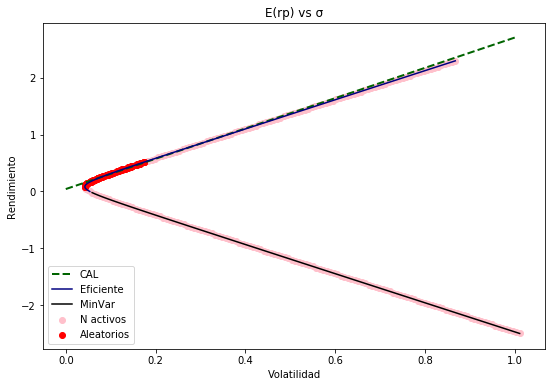

In [646]:
plt.title("Sigma vs Rendimiento")
plt.scatter(Sigmas_N,Rendimientos_N,color="pink",label="N activos") 
plt.scatter(X4,Y4,label="Aleatorios",color='red')
plot_CAL2(Rendimientos[43],Sigmas[43])
grafica_fronteras(a,b,c,d)
plt.rcParams["figure.figsize"] =[9, 6]

plt.legend(loc="lower left");
